parsing log, completed traces ::   0%|          | 0/5000 [00:00<?, ?it/s]

The process discovered from the log consists of 7 activities, 3 resources, 32777 events related to 5000 cases, and 103 different execution paths (process variants).
Basic Statistics
                              concept:name  \
count                                32777   
unique                                   7   
top     Move the container to Storage Area   
freq                                  9200   
mean                                   NaN   
min                                    NaN   
25%                                    NaN   
50%                                    NaN   
75%                                    NaN   
max                                    NaN   
std                                    NaN   

                             time:timestamp org:resource          cost  \
count                                 32777        32777  32777.000000   
unique                                  NaN            3           NaN   
top                                     NaN

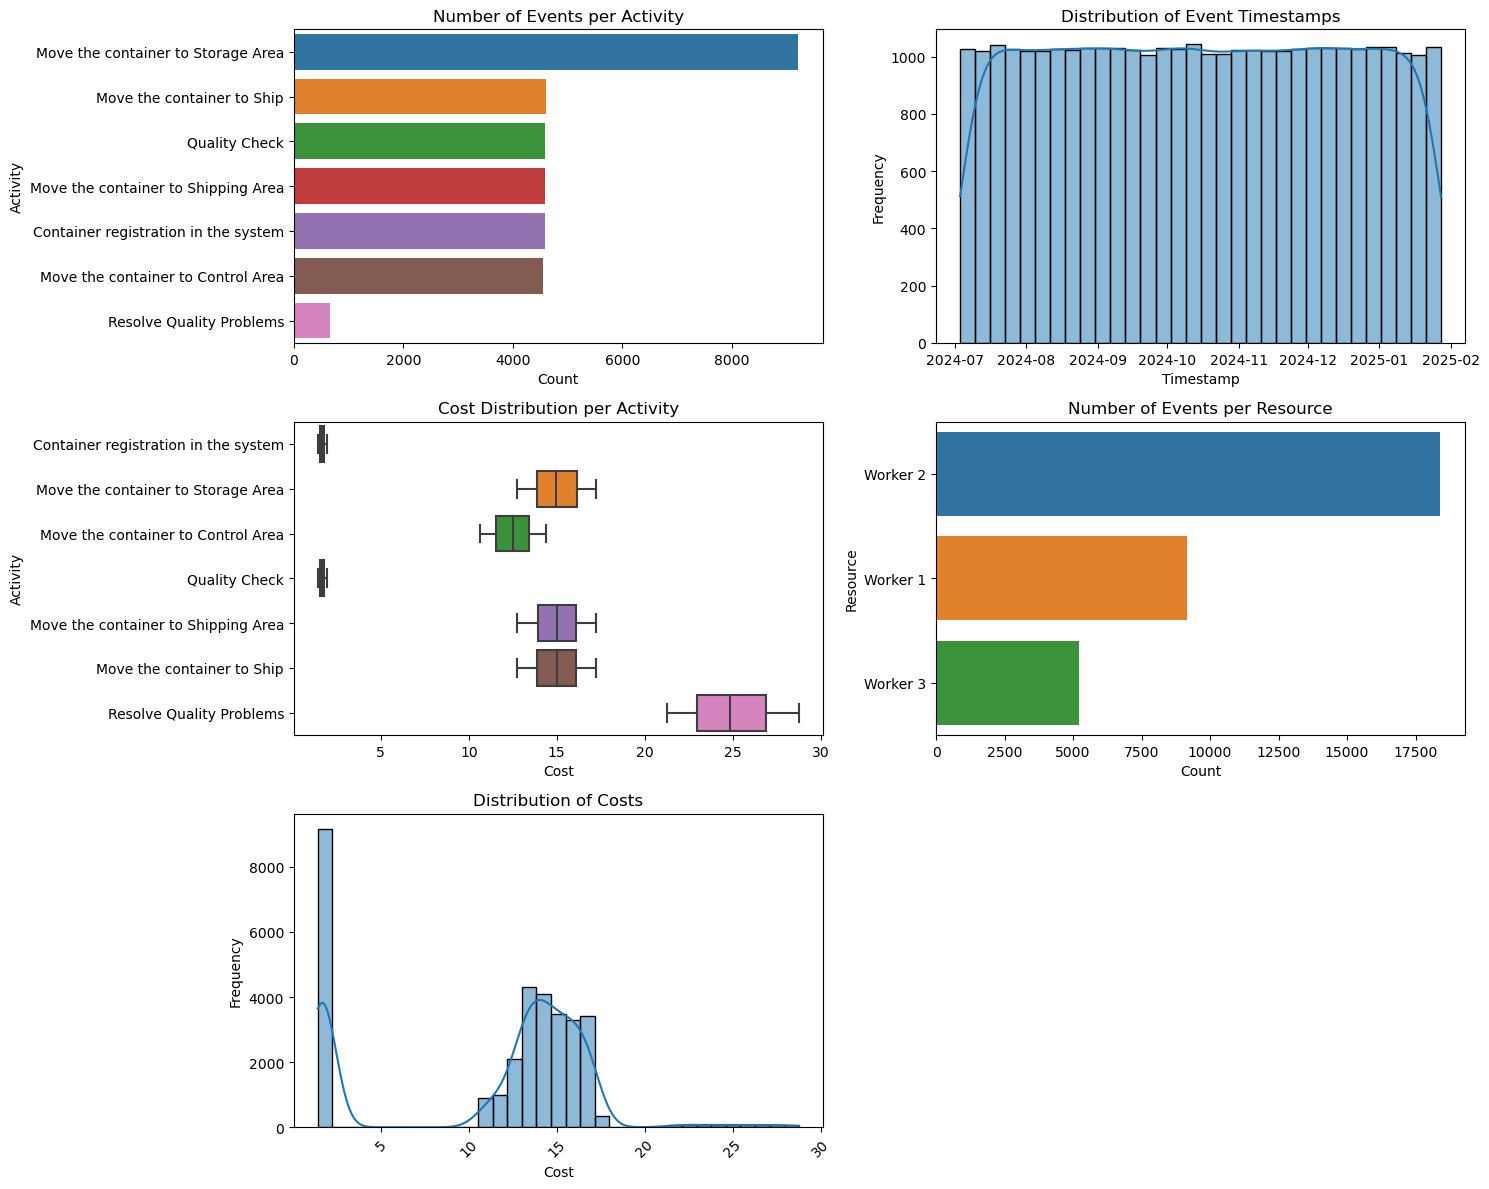

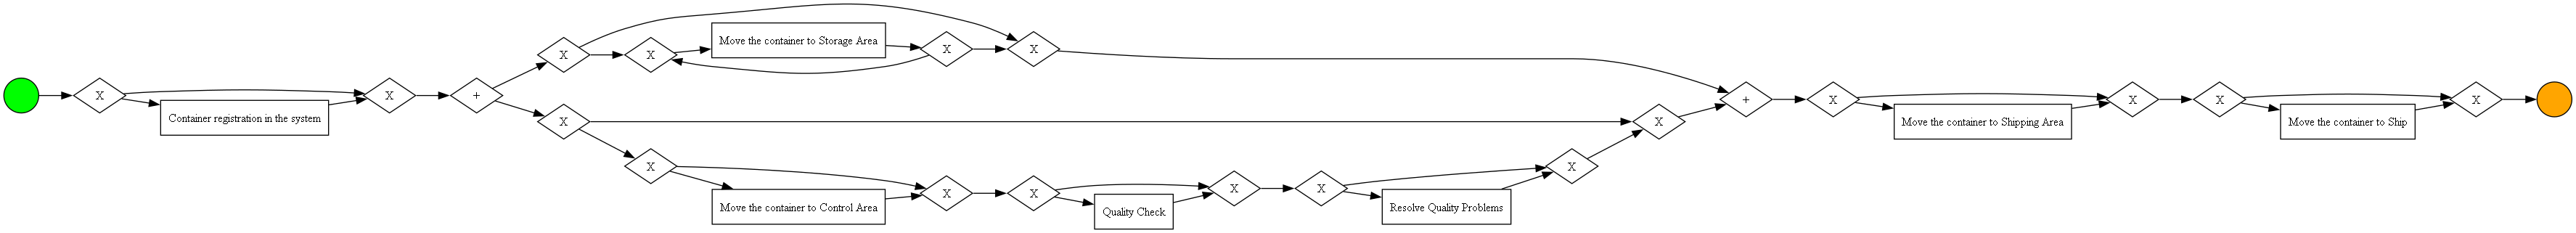

BPMN Model Discovered with noise


In [41]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import pm4py
import matplotlib.pyplot as plt
import seaborn as sns
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer
from pm4py.objects.bpmn.exporter import exporter as bpmn_exporter
import matplotlib.pyplot as plt

# Path to the XES file
xes_file_path = "SmartHarbor_process_log.xes"

# Import the event log
log = xes_importer.apply(xes_file_path)

# Convert the log to a DataFrame
df_log = pm4py.convert_to_dataframe(log)

# Number of activities
num_activities = df_log['concept:name'].nunique()

# Number of resources
num_resources = df_log['org:resource'].nunique()

# Number of events
num_events = df_log.shape[0]

# Number of cases
num_cases = df_log['case:concept:name'].nunique()

# Number of execution variants
variants = pm4py.get_variants_as_tuples(log)
num_variants = len(variants)

# Display the extracted information
print(f"The process discovered from the log consists of {num_activities} activities, {num_resources} resources, {num_events} events related to {num_cases} cases, and {num_variants} different execution paths (process variants).")

# Display basic statistics and visualizations
print("Basic Statistics")
print(df_log.describe(include='all', datetime_is_numeric=True))

plt.figure(figsize=(15, 12))
plt.subplot(3, 2, 1)
sns.countplot(y='concept:name', data=df_log, order=df_log['concept:name'].value_counts().index).set(title='Number of Events per Activity', xlabel='Count', ylabel='Activity')
plt.subplot(3, 2, 2)
sns.histplot(df_log['time:timestamp'], kde=True).set(title='Distribution of Event Timestamps', xlabel='Timestamp', ylabel='Frequency')
plt.subplot(3, 2, 3)
sns.boxplot(x='cost', y='concept:name', data=df_log).set(title='Cost Distribution per Activity', xlabel='Cost', ylabel='Activity')
plt.subplot(3, 2, 4)
sns.countplot(y='org:resource', data=df_log, order=df_log['org:resource'].value_counts().index).set(title='Number of Events per Resource', xlabel='Count', ylabel='Resource')
plt.subplot(3, 2, 5)
sns.histplot(df_log['cost'], kde=True).set(title='Distribution of Costs', xlabel='Cost', ylabel='Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Discover the process model using the Inductive Miner algorithm
process_tree = pm4py.discover_process_tree_inductive(log)

# Convert the process tree to a BPMN model
bpmn_model = pt_converter.apply(process_tree, variant=pt_converter.Variants.TO_BPMN)

# Export the BPMN model to a file
bpmn_exporter.apply(bpmn_model, "SmartHarbor_process_model.bpmn")

# Visualize the BPMN model
gviz = bpmn_visualizer.apply(bpmn_model)
bpmn_visualizer.view(gviz)
print("BPMN Model Discovered with noise")

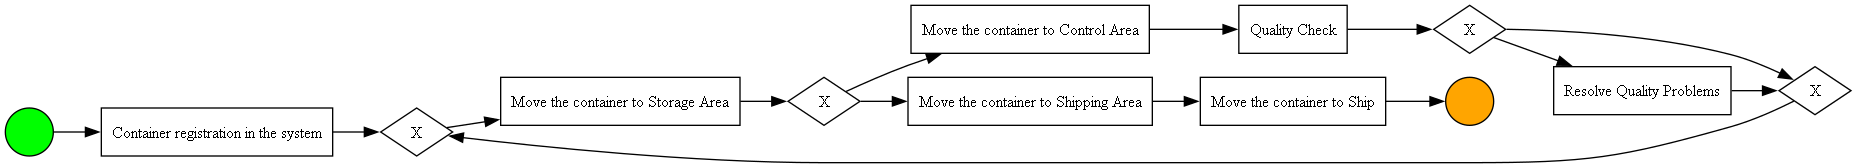

BPMN Model Discovered without noise


In [37]:
# Discover the process model using the Inductive Miner algorithm
process_tree = pm4py.discover_process_tree_inductive(log,0.2)

# Convert the process tree to a BPMN model
bpmn_model = pt_converter.apply(process_tree, variant=pt_converter.Variants.TO_BPMN)

# Export the BPMN model to a file
bpmn_exporter.apply(bpmn_model, "SmartHarbor_process_model.bpmn")

# Visualize the BPMN model
gviz = bpmn_visualizer.apply(bpmn_model)
bpmn_visualizer.view(gviz)
print("BPMN Model Discovered without noise")